In [2]:
import pandas as pd
import numpy as np


#processed XLS file
read_file= pd.DataFrame(pd.read_excel("S1Table.XLSX"))
#print(read_file)



# excel file converted into csv file
read_file.to_csv ("dataset.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("dataset.csv"))
  
print(df)#to check


   Status   Age       Site  M132T37p  M312T36p   M357T30p  M114T37p  \
0     DMD   8.0  Australia -5.900795 -6.692130  -8.181688 -8.241714   
1     DMD   4.0    Calgary -7.681591 -6.363260  -7.809234 -9.517703   
2     DMD   4.3    Calgary -5.763479 -6.497395  -7.586421 -8.529271   
3     DMD   4.3    Calgary -5.231625 -6.175428  -7.640971 -8.139534   
4     DMD   5.0    Calgary -5.649194 -7.098781  -8.144606 -8.515200   
..    ...   ...        ...       ...       ...        ...       ...   
68    DMD  18.7   UC Davis -9.449776 -6.770309 -10.482305 -8.162869   
69    DMD  19.9   UC Davis -5.956768 -6.484230 -10.129793 -8.860700   
70    DMD  20.6   UC Davis -5.727256 -5.979051  -9.159941 -7.619924   
71    DMD  26.6   UC Davis -5.938373 -6.706897 -10.915660 -8.754281   
72    DMD  27.2   UC Davis -5.652249 -6.513787 -10.704182 -8.853743   

    M604T163_1p  M176T36p  M604T163_2p  ...  M526T365n  M431T32n  M431T329n  \
0     -4.138729 -6.288298    -4.966778  ...  -4.517056 -4.497986  -3

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

   Status   Age     Site   M357T30p  M369T366n  M114T37p  M367T347n  M312T36p  \
1     DMD   4.0  Calgary  -7.809234  -7.735231 -9.517703  -7.373851 -6.363260   
2     DMD   4.3  Calgary  -7.586421  -7.735231 -8.529271  -7.373851 -6.497395   
3     DMD   4.3  Calgary  -7.640971  -7.735231 -8.139534  -7.373851 -6.175428   
4     DMD   5.0  Calgary  -8.144606  -7.373851 -8.515200  -6.158524 -7.098781   
5     DMD   5.0  Calgary  -8.099191  -6.800544 -7.747280  -6.497271 -6.764725   
6     DMD   5.4  Calgary  -7.375460  -7.735231 -7.373148  -6.692770 -6.504255   
7     DMD   6.8  Calgary  -7.595064  -7.735231 -6.820829  -6.007326 -7.076124   
8     DMD   7.7  Calgary  -7.415870  -5.735198 -8.244940  -1.915058 -6.883339   
9     DMD   9.5  Calgary  -8.875708  -5.769839 -7.797801  -5.173635 -6.745364   
10    DMD   9.6  Calgary  -9.613652  -7.735231 -7.616343  -7.373851 -6.751725   
11    DMD  10.8  Calgary  -8.077035  -6.007326 -7.681591  -5.769839 -6.397714   
12    DMD  12.1  Calgary  -8

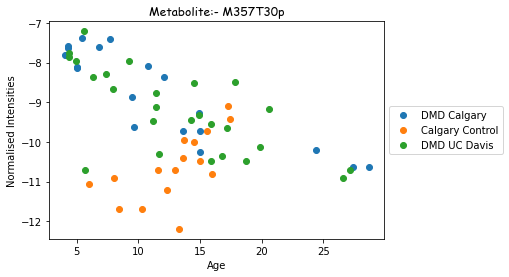

In [31]:
#plotting the metabolites to visualise the data before doing regression analysis

#creating a data frame for all top 14 peaks with the respective metabolite intensities, Sites,Age,Status
data_regframe = [df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],(df['M357T30p']),
                   (df['M369T366n']),(df['M114T37p']),(df['M367T347n']),(df['M312T36p']),(df['M132T37p']),(df['M451T372p']),(df['M270T359p']),
                   (df['M397T369n']),(df['M174T37p']),(df['M357T41n']),(df['M449T366n']),(df['M209T321p']),(df['M432T331p'])] 


regframe = pd.concat(data_regframe,axis=1, join='outer')#joining all cloumns
#print(regframe)
metsCalg =  regframe.loc[regframe['Site'] == 'Calgary']#calgary frame
metsCalg_control = metsCalg.loc[metsCalg['Status'] == 'Control']#calgary dataframe with Status Control
metsCalg_DMD = metsCalg.loc[metsCalg['Status'] == 'DMD']#calgary dataframe with Status DMD

metsDavis = regframe.loc[regframe['Site'] == 'UC Davis']#UC Davis dataframe
mets_Davis_DMD = metsDavis.loc[metsDavis['Status'] == 'DMD']#UC Davis dataframe with Status DMD

print(metsCalg_DMD) 


x = metsCalg_DMD.iloc[:,1]
y = metsCalg_DMD.iloc[:,3]
x1 =metsCalg_control.iloc[:,1]
y1 =metsCalg_control.iloc[:,3]
x3 = mets_Davis_DMD.iloc[:,1]
y3 = mets_Davis_DMD.iloc[:,3]

fig, ax = plt.subplots()
plt.scatter(x, y,label = 'DMD Calgary')
plt.scatter(x1, y1,label = 'Calgary Control')
plt.scatter(x3,y3,label = 'DMD UC Davis')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M357T30p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




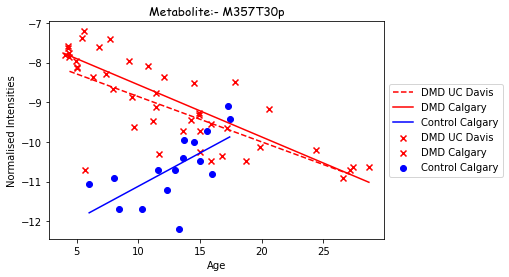

In [14]:
import statsmodels.api as sm
#for first metabolite top peak M357T30p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression 
######################
X_Calg_DMD1 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD1 = (metsCalg_DMD.iloc[:,3]).to_numpy()



X_Calg_DMD1 = X_Calg_DMD1.reshape(-1,1)
Y_Calg_DMD1 = Y_Calg_DMD1.reshape(-1,1)
X_Calg_DMD1 = np.concatenate((np.ones(len(X_Calg_DMD1)).reshape(-1,1), X_Calg_DMD1), axis=1)

results1 = sm.OLS(Y_Calg_DMD1, X_Calg_DMD1).fit()
#results.summary()
thetas_Calg_DMD1 = results1.params



############################
X_Davis_DMD = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD = (mets_Davis_DMD.iloc[:,3]).to_numpy()


X_Davis_DMD = X_Davis_DMD.reshape(-1,1)
Y_Davis_DMD = Y_Davis_DMD.reshape(-1,1)
X_Davis_DMD = np.concatenate((np.ones(len(X_Davis_DMD)).reshape(-1,1), X_Davis_DMD), axis=1)


results2 = sm.OLS(Y_Davis_DMD, X_Davis_DMD).fit()
#results.summary()
thetas_Davis_DMD = results2.params

############################
X_metsCalg_control = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control = (metsCalg_control.iloc[:,3]).to_numpy()

X_metsCalg_control = X_metsCalg_control.reshape(-1,1)
Y_metsCalg_control = Y_metsCalg_control.reshape(-1,1)
X_metsCalg_control = np.concatenate((np.ones(len(X_metsCalg_control)).reshape(-1,1), X_metsCalg_control), axis=1)

results3 = sm.OLS(Y_metsCalg_control, X_metsCalg_control).fit()
#results.summary()
thetas_metsCalg_control = results3.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD[:,1],Y_Davis_DMD, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD[:,1], np.dot(X_Davis_DMD, thetas_Davis_DMD), 'r',linestyle='dashed',label = 'DMD UC Davis')#slope

plt.scatter(X_Calg_DMD1[:,1],Y_Calg_DMD1, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD1[:,1], np.dot(X_Calg_DMD1, thetas_Calg_DMD1), 'r',label = 'DMD Calgary')#slope

plt.scatter(X_metsCalg_control[:,1],Y_metsCalg_control, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control[:,1], np.dot(X_metsCalg_control, thetas_metsCalg_control), 'b',label = 'Control Calgary')#slope
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M357T30p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




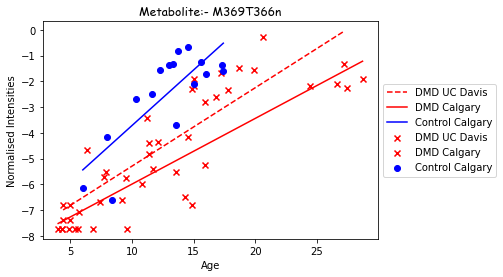

In [15]:
######################
#for first metabolite top peak M369T366n against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression 

######################
X_Calg_DMD2 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD2 = (metsCalg_DMD.iloc[:,4]).to_numpy()



X_Calg_DMD2 = X_Calg_DMD2.reshape(-1,1)
Y_Calg_DMD2 = Y_Calg_DMD2.reshape(-1,1)
X_Calg_DMD2 = np.concatenate((np.ones(len(X_Calg_DMD2)).reshape(-1,1), X_Calg_DMD2), axis=1)

results4 = sm.OLS(Y_Calg_DMD2, X_Calg_DMD2).fit()
#results.summary()
thetas_Calg_DMD2 = results4.params



############################
X_Davis_DMD2 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD2 = (mets_Davis_DMD.iloc[:,4]).to_numpy()


X_Davis_DMD2 = X_Davis_DMD2.reshape(-1,1)
Y_Davis_DMD2 = Y_Davis_DMD2.reshape(-1,1)
X_Davis_DMD2 = np.concatenate((np.ones(len(X_Davis_DMD2)).reshape(-1,1), X_Davis_DMD2), axis=1)


results5 = sm.OLS(Y_Davis_DMD2, X_Davis_DMD2).fit()
#results.summary()
thetas_Davis_DMD2 = results5.params

############################
X_metsCalg_control2 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control2 = (metsCalg_control.iloc[:,4]).to_numpy()

X_metsCalg_control2 = X_metsCalg_control2.reshape(-1,1)
Y_metsCalg_control2 = Y_metsCalg_control2.reshape(-1,1)
X_metsCalg_control2 = np.concatenate((np.ones(len(X_metsCalg_control2)).reshape(-1,1), X_metsCalg_control2), axis=1)

results6 = sm.OLS(Y_metsCalg_control2, X_metsCalg_control2).fit()
#results.summary()
thetas_metsCalg_control2 = results6.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD2[:,1],Y_Davis_DMD2, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD2[:,1], np.dot(X_Davis_DMD2, thetas_Davis_DMD2), 'r',linestyle='dashed',label = 'DMD UC Davis')#slope

plt.scatter(X_Calg_DMD2[:,1],Y_Calg_DMD2, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD2[:,1], np.dot(X_Calg_DMD2, thetas_Calg_DMD2), 'r',label = 'DMD Calgary')#slope

plt.scatter(X_metsCalg_control2[:,1],Y_metsCalg_control2, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control2[:,1], np.dot(X_metsCalg_control2, thetas_metsCalg_control2), 'b',label = 'Control Calgary')#slope
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M369T366n', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





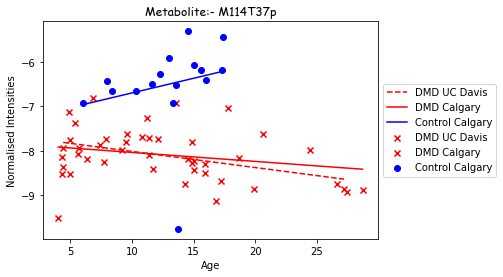

In [26]:
#for first metabolite top peak M114T37p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression




X_Calg_DMD3 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD3 = (metsCalg_DMD.iloc[:,5]).to_numpy()



X_Calg_DMD3 = X_Calg_DMD3.reshape(-1,1)
Y_Calg_DMD3 = Y_Calg_DMD3.reshape(-1,1)
X_Calg_DMD3 = np.concatenate((np.ones(len(X_Calg_DMD3)).reshape(-1,1), X_Calg_DMD3), axis=1)

results7 = sm.OLS(Y_Calg_DMD3, X_Calg_DMD3).fit()
#results.summary()
thetas_Calg_DMD3 = results7.params



############################
X_Davis_DMD3 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD3 = (mets_Davis_DMD.iloc[:,5]).to_numpy()


X_Davis_DMD3 = X_Davis_DMD3.reshape(-1,1)
Y_Davis_DMD3 = Y_Davis_DMD3.reshape(-1,1)
X_Davis_DMD3 = np.concatenate((np.ones(len(X_Davis_DMD3)).reshape(-1,1), X_Davis_DMD3), axis=1)


results8 = sm.OLS(Y_Davis_DMD3, X_Davis_DMD3).fit()
#results.summary()
thetas_Davis_DMD3 = results8.params

############################
X_metsCalg_control3 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control3 = (metsCalg_control.iloc[:,5]).to_numpy()

X_metsCalg_control3 = X_metsCalg_control3.reshape(-1,1)
Y_metsCalg_control3 = Y_metsCalg_control3.reshape(-1,1)
X_metsCalg_control3 = np.concatenate((np.ones(len(X_metsCalg_control3)).reshape(-1,1), X_metsCalg_control3), axis=1)

results9 = sm.OLS(Y_metsCalg_control3, X_metsCalg_control3).fit()
#results.summary()
thetas_metsCalg_control3 = results9.params






fig, ax = plt.subplots()
#plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(X_Davis_DMD3[:,1],Y_Davis_DMD3, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD3[:,1], np.dot(X_Davis_DMD3, thetas_Davis_DMD3), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD3[:,1],Y_Calg_DMD3, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD3[:,1], np.dot(X_Calg_DMD3, thetas_Calg_DMD3), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control3[:,1],Y_metsCalg_control3, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control3[:,1], np.dot(X_metsCalg_control3, thetas_metsCalg_control3), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M114T37p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





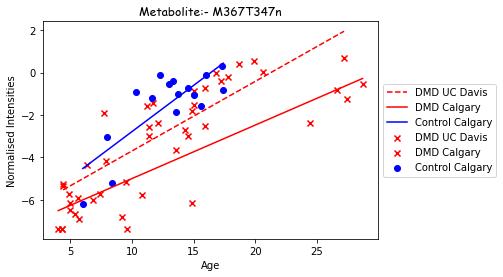

In [27]:
#for first metabolite top peak M367T347n against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD4 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD4 = (metsCalg_DMD.iloc[:,6]).to_numpy()



X_Calg_DMD4 = X_Calg_DMD4.reshape(-1,1)
Y_Calg_DMD4 = Y_Calg_DMD4.reshape(-1,1)
X_Calg_DMD4 = np.concatenate((np.ones(len(X_Calg_DMD4)).reshape(-1,1), X_Calg_DMD4), axis=1)

results10 = sm.OLS(Y_Calg_DMD4, X_Calg_DMD4).fit()
#results.summary()
thetas_Calg_DMD4 = results10.params



############################
X_Davis_DMD4 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD4 = (mets_Davis_DMD.iloc[:,6]).to_numpy()


X_Davis_DMD4 = X_Davis_DMD4.reshape(-1,1)
Y_Davis_DMD4 = Y_Davis_DMD4.reshape(-1,1)
X_Davis_DMD4 = np.concatenate((np.ones(len(X_Davis_DMD4)).reshape(-1,1), X_Davis_DMD4), axis=1)


results11 = sm.OLS(Y_Davis_DMD4, X_Davis_DMD4).fit()
#results.summary()
thetas_Davis_DMD4 = results11.params

############################
X_metsCalg_control4 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control4 = (metsCalg_control.iloc[:,6]).to_numpy()

X_metsCalg_control4 = X_metsCalg_control4.reshape(-1,1)
Y_metsCalg_control4 = Y_metsCalg_control4.reshape(-1,1)
X_metsCalg_control4 = np.concatenate((np.ones(len(X_metsCalg_control4)).reshape(-1,1), X_metsCalg_control4), axis=1)

results12 = sm.OLS(Y_metsCalg_control4, X_metsCalg_control4).fit()
#results.summary()
thetas_metsCalg_control4 = results12.params






fig, ax = plt.subplots()
#plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(X_Davis_DMD4[:,1],Y_Davis_DMD4, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD4[:,1], np.dot(X_Davis_DMD4, thetas_Davis_DMD4), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD4[:,1],Y_Calg_DMD4, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD4[:,1], np.dot(X_Calg_DMD4, thetas_Calg_DMD4), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control4[:,1],Y_metsCalg_control4, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control4[:,1], np.dot(X_metsCalg_control4, thetas_metsCalg_control4), 'b',label = 'Control Calgary')

plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M367T347n', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




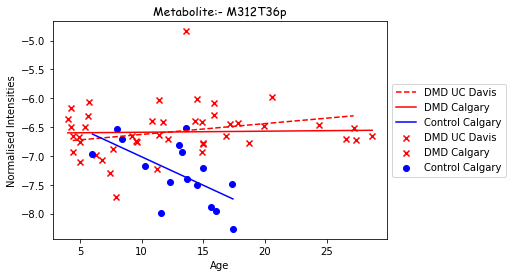

In [28]:
#for first metabolite top peak M312T36p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression



X_Calg_DMD5 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD5 = (metsCalg_DMD.iloc[:,7]).to_numpy()



X_Calg_DMD5 = X_Calg_DMD5.reshape(-1,1)
Y_Calg_DMD5 = Y_Calg_DMD5.reshape(-1,1)
X_Calg_DMD5 = np.concatenate((np.ones(len(X_Calg_DMD5)).reshape(-1,1), X_Calg_DMD5), axis=1)

results13 = sm.OLS(Y_Calg_DMD5, X_Calg_DMD5).fit()
#results.summary()
thetas_Calg_DMD5 = results13.params



############################
X_Davis_DMD5 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD5 = (mets_Davis_DMD.iloc[:,7]).to_numpy()


X_Davis_DMD5 = X_Davis_DMD5.reshape(-1,1)
Y_Davis_DMD5 = Y_Davis_DMD5.reshape(-1,1)
X_Davis_DMD5 = np.concatenate((np.ones(len(X_Davis_DMD5)).reshape(-1,1), X_Davis_DMD5), axis=1)


results14 = sm.OLS(Y_Davis_DMD5, X_Davis_DMD5).fit()
#results.summary()
thetas_Davis_DMD5 = results14.params

############################
X_metsCalg_control5 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control5 = (metsCalg_control.iloc[:,7]).to_numpy()

X_metsCalg_control5 = X_metsCalg_control5.reshape(-1,1)
Y_metsCalg_control5 = Y_metsCalg_control5.reshape(-1,1)
X_metsCalg_control5 = np.concatenate((np.ones(len(X_metsCalg_control5)).reshape(-1,1), X_metsCalg_control5), axis=1)

results15 = sm.OLS(Y_metsCalg_control5, X_metsCalg_control5).fit()
#results.summary()
thetas_metsCalg_control5 = results15.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD5[:,1],Y_Davis_DMD5, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD5[:,1], np.dot(X_Davis_DMD5, thetas_Davis_DMD5), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD5[:,1],Y_Calg_DMD5, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD5[:,1], np.dot(X_Calg_DMD5, thetas_Calg_DMD5), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control5[:,1],Y_metsCalg_control5, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control5[:,1], np.dot(X_metsCalg_control5, thetas_metsCalg_control5), 'b',label = 'Control Calgary')

plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M312T36p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




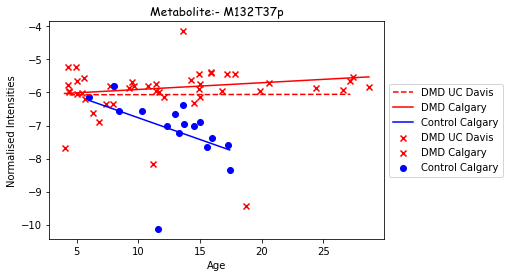

In [29]:
#for first metabolite top peak M132T37p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD6 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD6 = (metsCalg_DMD.iloc[:,8]).to_numpy()



X_Calg_DMD6 = X_Calg_DMD6.reshape(-1,1)
Y_Calg_DMD6 = Y_Calg_DMD6.reshape(-1,1)
X_Calg_DMD6 = np.concatenate((np.ones(len(X_Calg_DMD6)).reshape(-1,1), X_Calg_DMD6), axis=1)

results16 = sm.OLS(Y_Calg_DMD6, X_Calg_DMD6).fit()
#results.summary()
thetas_Calg_DMD6 = results16.params



############################
X_Davis_DMD6 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD6 = (mets_Davis_DMD.iloc[:,8]).to_numpy()


X_Davis_DMD6 = X_Davis_DMD6.reshape(-1,1)
Y_Davis_DMD6 = Y_Davis_DMD6.reshape(-1,1)
X_Davis_DMD6 = np.concatenate((np.ones(len(X_Davis_DMD6)).reshape(-1,1), X_Davis_DMD6), axis=1)


results17 = sm.OLS(Y_Davis_DMD6, X_Davis_DMD6).fit()
#results.summary()
thetas_Davis_DMD6 = results17.params

############################
X_metsCalg_control6 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control6 = (metsCalg_control.iloc[:,8]).to_numpy()

X_metsCalg_control6 = X_metsCalg_control6.reshape(-1,1)
Y_metsCalg_control6 = Y_metsCalg_control6.reshape(-1,1)
X_metsCalg_control6 = np.concatenate((np.ones(len(X_metsCalg_control6)).reshape(-1,1), X_metsCalg_control6), axis=1)

results18 = sm.OLS(Y_metsCalg_control6, X_metsCalg_control6).fit()
#results.summary()
thetas_metsCalg_control6 = results18.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD6[:,1],Y_Davis_DMD6, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD6[:,1], np.dot(X_Davis_DMD6, thetas_Davis_DMD6), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD6[:,1],Y_Calg_DMD6, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD6[:,1], np.dot(X_Calg_DMD6, thetas_Calg_DMD6), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control6[:,1],Y_metsCalg_control6, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control6[:,1], np.dot(X_metsCalg_control6, thetas_metsCalg_control6), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M132T37p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





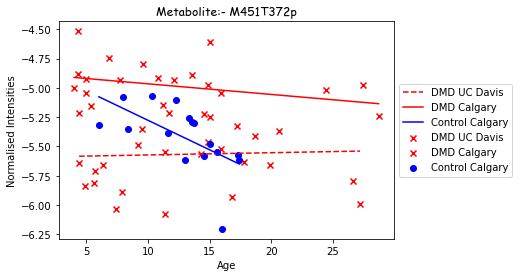

In [25]:
#for first metabolite top peak M451T372 against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD7 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD7 = (metsCalg_DMD.iloc[:,9]).to_numpy()



X_Calg_DMD7 = X_Calg_DMD7.reshape(-1,1)
Y_Calg_DMD7 = Y_Calg_DMD7.reshape(-1,1)
X_Calg_DMD7 = np.concatenate((np.ones(len(X_Calg_DMD7)).reshape(-1,1), X_Calg_DMD7), axis=1)

results19 = sm.OLS(Y_Calg_DMD7, X_Calg_DMD7).fit()
#results.summary()
thetas_Calg_DMD7 = results19.params



############################
X_Davis_DMD7 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD7 = (mets_Davis_DMD.iloc[:,9]).to_numpy()


X_Davis_DMD7 = X_Davis_DMD7.reshape(-1,1)
Y_Davis_DMD7 = Y_Davis_DMD7.reshape(-1,1)
X_Davis_DMD7 = np.concatenate((np.ones(len(X_Davis_DMD7)).reshape(-1,1), X_Davis_DMD7), axis=1)


results20 = sm.OLS(Y_Davis_DMD7, X_Davis_DMD7).fit()
#results.summary()
thetas_Davis_DMD7 = results20.params

############################
X_metsCalg_control7 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control7 = (metsCalg_control.iloc[:,9]).to_numpy()

X_metsCalg_control7 = X_metsCalg_control7.reshape(-1,1)
Y_metsCalg_control7 = Y_metsCalg_control7.reshape(-1,1)
X_metsCalg_control7 = np.concatenate((np.ones(len(X_metsCalg_control7)).reshape(-1,1), X_metsCalg_control7), axis=1)

results21 = sm.OLS(Y_metsCalg_control7, X_metsCalg_control7).fit()
#results.summary()
thetas_metsCalg_control7 = results21.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD7[:,1],Y_Davis_DMD7, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD7[:,1], np.dot(X_Davis_DMD7, thetas_Davis_DMD7), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD7[:,1],Y_Calg_DMD7, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD7[:,1], np.dot(X_Calg_DMD7, thetas_Calg_DMD7), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control7[:,1],Y_metsCalg_control7, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control7[:,1], np.dot(X_metsCalg_control7, thetas_metsCalg_control7), 'b',label = 'Control Calgary')

plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M451T372p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




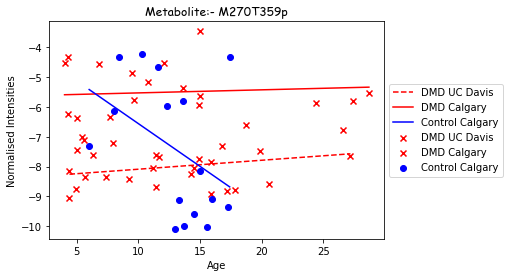

In [30]:
#for first metabolite top peak M270T359p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression

X_Calg_DMD8 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD8 = (metsCalg_DMD.iloc[:,10]).to_numpy()



X_Calg_DMD8 = X_Calg_DMD8.reshape(-1,1)
Y_Calg_DMD8 = Y_Calg_DMD8.reshape(-1,1)
X_Calg_DMD8 = np.concatenate((np.ones(len(X_Calg_DMD8)).reshape(-1,1), X_Calg_DMD8), axis=1)

results22 = sm.OLS(Y_Calg_DMD8, X_Calg_DMD8).fit()
#results.summary()
thetas_Calg_DMD8 = results22.params



############################
X_Davis_DMD8 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD8 = (mets_Davis_DMD.iloc[:,10]).to_numpy()


X_Davis_DMD8 = X_Davis_DMD8.reshape(-1,1)
Y_Davis_DMD8 = Y_Davis_DMD8.reshape(-1,1)
X_Davis_DMD8 = np.concatenate((np.ones(len(X_Davis_DMD8)).reshape(-1,1), X_Davis_DMD8), axis=1)


results23 = sm.OLS(Y_Davis_DMD8, X_Davis_DMD8).fit()
#results.summary()
thetas_Davis_DMD8 = results23.params

############################
X_metsCalg_control8 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control8 = (metsCalg_control.iloc[:,10]).to_numpy()

X_metsCalg_control8 = X_metsCalg_control8.reshape(-1,1)
Y_metsCalg_control8 = Y_metsCalg_control8.reshape(-1,1)
X_metsCalg_control8 = np.concatenate((np.ones(len(X_metsCalg_control8)).reshape(-1,1), X_metsCalg_control8), axis=1)

results24 = sm.OLS(Y_metsCalg_control8, X_metsCalg_control8).fit()
#results.summary()
thetas_metsCalg_control8 = results24.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD8[:,1],Y_Davis_DMD8, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD8[:,1], np.dot(X_Davis_DMD8, thetas_Davis_DMD8), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD8[:,1],Y_Calg_DMD8, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD8[:,1], np.dot(X_Calg_DMD8, thetas_Calg_DMD8), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control8[:,1],Y_metsCalg_control8, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control8[:,1], np.dot(X_metsCalg_control8, thetas_metsCalg_control8), 'b',label = 'Control Calgary')

plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M270T359p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))




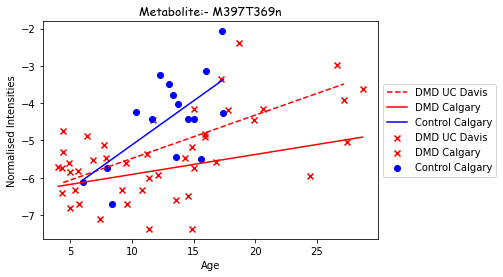

In [22]:
#for first metabolite top peak M397T369n against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression

X_Calg_DMD9 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD9 = (metsCalg_DMD.iloc[:,11]).to_numpy()



X_Calg_DMD9 = X_Calg_DMD9.reshape(-1,1)
Y_Calg_DMD9 = Y_Calg_DMD9.reshape(-1,1)
X_Calg_DMD9 = np.concatenate((np.ones(len(X_Calg_DMD9)).reshape(-1,1), X_Calg_DMD9), axis=1)

results25 = sm.OLS(Y_Calg_DMD9, X_Calg_DMD9).fit()
#results.summary()
thetas_Calg_DMD9 = results25.params



############################
X_Davis_DMD9 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD9 = (mets_Davis_DMD.iloc[:,11]).to_numpy()


X_Davis_DMD9 = X_Davis_DMD9.reshape(-1,1)
Y_Davis_DMD9 = Y_Davis_DMD9.reshape(-1,1)
X_Davis_DMD9 = np.concatenate((np.ones(len(X_Davis_DMD9)).reshape(-1,1), X_Davis_DMD9), axis=1)


results26 = sm.OLS(Y_Davis_DMD9, X_Davis_DMD9).fit()
#results.summary()
thetas_Davis_DMD9 = results26.params

############################
X_metsCalg_control9 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control9 = (metsCalg_control.iloc[:,11]).to_numpy()

X_metsCalg_control9 = X_metsCalg_control9.reshape(-1,1)
Y_metsCalg_control9 = Y_metsCalg_control9.reshape(-1,1)
X_metsCalg_control9 = np.concatenate((np.ones(len(X_metsCalg_control9)).reshape(-1,1), X_metsCalg_control9), axis=1)

results27 = sm.OLS(Y_metsCalg_control9, X_metsCalg_control9).fit()
#results.summary()
thetas_metsCalg_control9 = results27.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD9[:,1],Y_Davis_DMD9, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD9[:,1], np.dot(X_Davis_DMD9, thetas_Davis_DMD9), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD9[:,1],Y_Calg_DMD9, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD9[:,1], np.dot(X_Calg_DMD9, thetas_Calg_DMD9), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control9[:,1],Y_metsCalg_control9, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control9[:,1], np.dot(X_metsCalg_control9, thetas_metsCalg_control9), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M397T369n', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





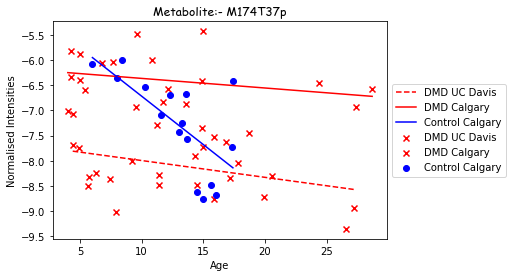

In [21]:
#for first metabolite top peak M174T37p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD10 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD10 = (metsCalg_DMD.iloc[:,12]).to_numpy()



X_Calg_DMD10 = X_Calg_DMD10.reshape(-1,1)
Y_Calg_DMD10 = Y_Calg_DMD10.reshape(-1,1)
X_Calg_DMD10 = np.concatenate((np.ones(len(X_Calg_DMD10)).reshape(-1,1), X_Calg_DMD10), axis=1)

results28 = sm.OLS(Y_Calg_DMD10, X_Calg_DMD10).fit()
#results.summary()
thetas_Calg_DMD10 = results28.params



############################
X_Davis_DMD10 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD10 = (mets_Davis_DMD.iloc[:,12]).to_numpy()


X_Davis_DMD10 = X_Davis_DMD10.reshape(-1,1)
Y_Davis_DMD10 = Y_Davis_DMD10.reshape(-1,1)
X_Davis_DMD10 = np.concatenate((np.ones(len(X_Davis_DMD10)).reshape(-1,1), X_Davis_DMD10), axis=1)


results29 = sm.OLS(Y_Davis_DMD10, X_Davis_DMD10).fit()
#results.summary()
thetas_Davis_DMD10 = results29.params

############################
X_metsCalg_control10 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control10 = (metsCalg_control.iloc[:,12]).to_numpy()

X_metsCalg_control10 = X_metsCalg_control10.reshape(-1,1)
Y_metsCalg_control10 = Y_metsCalg_control10.reshape(-1,1)
X_metsCalg_control10 = np.concatenate((np.ones(len(X_metsCalg_control10)).reshape(-1,1), X_metsCalg_control10), axis=1)

results30 = sm.OLS(Y_metsCalg_control10, X_metsCalg_control10).fit()
#results.summary()
thetas_metsCalg_control10 = results30.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD10[:,1],Y_Davis_DMD10, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD10[:,1], np.dot(X_Davis_DMD10, thetas_Davis_DMD10), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD10[:,1],Y_Calg_DMD10, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD10[:,1], np.dot(X_Calg_DMD10, thetas_Calg_DMD10), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control10[:,1],Y_metsCalg_control10, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control10[:,1], np.dot(X_metsCalg_control10, thetas_metsCalg_control10), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M174T37p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





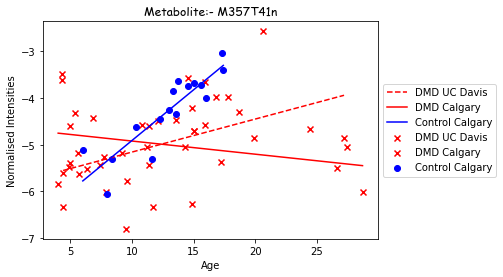

In [20]:
#for first metabolite top peak M357T41n against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD11 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD11 = (metsCalg_DMD.iloc[:,13]).to_numpy()



X_Calg_DMD11 = X_Calg_DMD11.reshape(-1,1)
Y_Calg_DMD11 = Y_Calg_DMD11.reshape(-1,1)
X_Calg_DMD11 = np.concatenate((np.ones(len(X_Calg_DMD11)).reshape(-1,1), X_Calg_DMD11), axis=1)

results31 = sm.OLS(Y_Calg_DMD11, X_Calg_DMD11).fit()
#results.summary()
thetas_Calg_DMD11 = results31.params



############################
X_Davis_DMD11 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD11 = (mets_Davis_DMD.iloc[:,13]).to_numpy()


X_Davis_DMD11 = X_Davis_DMD11.reshape(-1,1)
Y_Davis_DMD11 = Y_Davis_DMD11.reshape(-1,1)
X_Davis_DMD11 = np.concatenate((np.ones(len(X_Davis_DMD11)).reshape(-1,1), X_Davis_DMD11), axis=1)


results32 = sm.OLS(Y_Davis_DMD11, X_Davis_DMD11).fit()
#results.summary()
thetas_Davis_DMD11 = results32.params

############################
X_metsCalg_control11 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control11 = (metsCalg_control.iloc[:,13]).to_numpy()

X_metsCalg_control11 = X_metsCalg_control11.reshape(-1,1)
Y_metsCalg_control11 = Y_metsCalg_control11.reshape(-1,1)
X_metsCalg_control11 = np.concatenate((np.ones(len(X_metsCalg_control11)).reshape(-1,1), X_metsCalg_control11), axis=1)

results33 = sm.OLS(Y_metsCalg_control11, X_metsCalg_control11).fit()
#results.summary()
thetas_metsCalg_control11 = results33.params






fig, ax = plt.subplots()

plt.scatter(X_Davis_DMD11[:,1],Y_Davis_DMD11, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD11[:,1], np.dot(X_Davis_DMD11, thetas_Davis_DMD11), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD11[:,1],Y_Calg_DMD11, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD11[:,1], np.dot(X_Calg_DMD11, thetas_Calg_DMD11), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control11[:,1],Y_metsCalg_control11, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control11[:,1], np.dot(X_metsCalg_control11, thetas_metsCalg_control11), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M357T41n', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





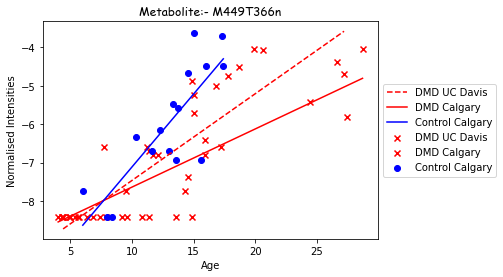

In [19]:
#for first metabolite top peak M449T366n against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD12 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD12 = (metsCalg_DMD.iloc[:,14]).to_numpy()



X_Calg_DMD12 = X_Calg_DMD12.reshape(-1,1)
Y_Calg_DMD12 = Y_Calg_DMD12.reshape(-1,1)
X_Calg_DMD12 = np.concatenate((np.ones(len(X_Calg_DMD12)).reshape(-1,1), X_Calg_DMD12), axis=1)

results34 = sm.OLS(Y_Calg_DMD12, X_Calg_DMD12).fit()
#results.summary()
thetas_Calg_DMD12 = results34.params



############################
X_Davis_DMD12 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD12 = (mets_Davis_DMD.iloc[:,14]).to_numpy()


X_Davis_DMD12 = X_Davis_DMD12.reshape(-1,1)
Y_Davis_DMD12 = Y_Davis_DMD12.reshape(-1,1)
X_Davis_DMD12 = np.concatenate((np.ones(len(X_Davis_DMD12)).reshape(-1,1), X_Davis_DMD12), axis=1)


results35 = sm.OLS(Y_Davis_DMD12, X_Davis_DMD12).fit()
#results.summary()
thetas_Davis_DMD12 = results35.params

############################
X_metsCalg_control12 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control12 = (metsCalg_control.iloc[:,14]).to_numpy()

X_metsCalg_control12 = X_metsCalg_control12.reshape(-1,1)
Y_metsCalg_control12 = Y_metsCalg_control12.reshape(-1,1)
X_metsCalg_control12 = np.concatenate((np.ones(len(X_metsCalg_control12)).reshape(-1,1), X_metsCalg_control12), axis=1)

results36 = sm.OLS(Y_metsCalg_control12, X_metsCalg_control12).fit()
#results.summary()
thetas_metsCalg_control12 = results36.params






fig, ax = plt.subplots()

plt.scatter(X_Davis_DMD12[:,1],Y_Davis_DMD12, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD12[:,1], np.dot(X_Davis_DMD12, thetas_Davis_DMD12), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD12[:,1],Y_Calg_DMD12, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD12[:,1], np.dot(X_Calg_DMD12, thetas_Calg_DMD12), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control12[:,1],Y_metsCalg_control12, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control12[:,1], np.dot(X_metsCalg_control12, thetas_metsCalg_control12), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M449T366n', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





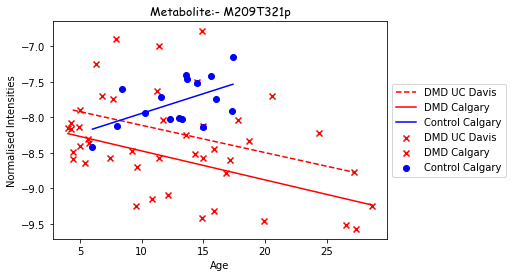

In [18]:
#for first metabolite top peak M209T321p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression


X_Calg_DMD13 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD13 = (metsCalg_DMD.iloc[:,15]).to_numpy()



X_Calg_DMD13 = X_Calg_DMD13.reshape(-1,1)
Y_Calg_DMD13 = Y_Calg_DMD13.reshape(-1,1)
X_Calg_DMD13 = np.concatenate((np.ones(len(X_Calg_DMD13)).reshape(-1,1), X_Calg_DMD13), axis=1)

results37 = sm.OLS(Y_Calg_DMD13, X_Calg_DMD13).fit()
#results.summary()
thetas_Calg_DMD13 = results37.params



############################
X_Davis_DMD13 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD13 = (mets_Davis_DMD.iloc[:,15]).to_numpy()


X_Davis_DMD13 = X_Davis_DMD13.reshape(-1,1)
Y_Davis_DMD13 = Y_Davis_DMD13.reshape(-1,1)
X_Davis_DMD13 = np.concatenate((np.ones(len(X_Davis_DMD13)).reshape(-1,1), X_Davis_DMD13), axis=1)


results38 = sm.OLS(Y_Davis_DMD13, X_Davis_DMD13).fit()
#results.summary()
thetas_Davis_DMD13 = results38.params

############################
X_metsCalg_control13 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control13 = (metsCalg_control.iloc[:,15]).to_numpy()

X_metsCalg_control13 = X_metsCalg_control13.reshape(-1,1)
Y_metsCalg_control13 = Y_metsCalg_control13.reshape(-1,1)
X_metsCalg_control13 = np.concatenate((np.ones(len(X_metsCalg_control13)).reshape(-1,1), X_metsCalg_control13), axis=1)

results39 = sm.OLS(Y_metsCalg_control13, X_metsCalg_control13).fit()
#results.summary()
thetas_metsCalg_control13 = results39.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD13[:,1],Y_Davis_DMD13, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD13[:,1], np.dot(X_Davis_DMD13, thetas_Davis_DMD13), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD13[:,1],Y_Calg_DMD13, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD13[:,1], np.dot(X_Calg_DMD13, thetas_Calg_DMD13), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control13[:,1],Y_metsCalg_control13, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control13[:,1], np.dot(X_metsCalg_control13, thetas_metsCalg_control13), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M209T321p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





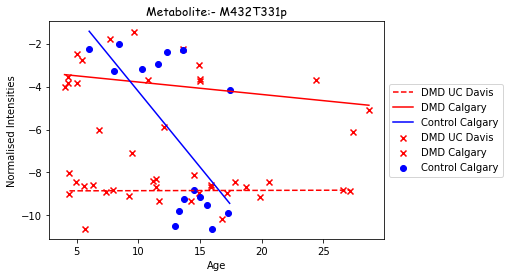

In [17]:
#for first metabolite top peak M432T331p against age for DMD UCdavis/DMDCalgary/ControlCalgary
#fit regression

X_Calg_DMD14 = (metsCalg_DMD.iloc[:,1]).to_numpy()
Y_Calg_DMD14 = (metsCalg_DMD.iloc[:,16]).to_numpy()



X_Calg_DMD14 = X_Calg_DMD14.reshape(-1,1)
Y_Calg_DMD14 = Y_Calg_DMD14.reshape(-1,1)
X_Calg_DMD14 = np.concatenate((np.ones(len(X_Calg_DMD14)).reshape(-1,1), X_Calg_DMD14), axis=1)

results40 = sm.OLS(Y_Calg_DMD14, X_Calg_DMD14).fit()
#results.summary()
thetas_Calg_DMD14 = results40.params



############################
X_Davis_DMD14 = (mets_Davis_DMD.iloc[:,1]).to_numpy()
Y_Davis_DMD14 = (mets_Davis_DMD.iloc[:,16]).to_numpy()


X_Davis_DMD14 = X_Davis_DMD14.reshape(-1,1)
Y_Davis_DMD14 = Y_Davis_DMD14.reshape(-1,1)
X_Davis_DMD14 = np.concatenate((np.ones(len(X_Davis_DMD14)).reshape(-1,1), X_Davis_DMD14), axis=1)


results41 = sm.OLS(Y_Davis_DMD14, X_Davis_DMD14).fit()
#results.summary()
thetas_Davis_DMD14 = results41.params

############################
X_metsCalg_control14 = (metsCalg_control.iloc[:,1]).to_numpy()
Y_metsCalg_control14 = (metsCalg_control.iloc[:,16]).to_numpy()

X_metsCalg_control14 = X_metsCalg_control14.reshape(-1,1)
Y_metsCalg_control14 = Y_metsCalg_control14.reshape(-1,1)
X_metsCalg_control14 = np.concatenate((np.ones(len(X_metsCalg_control14)).reshape(-1,1), X_metsCalg_control14), axis=1)

results42 = sm.OLS(Y_metsCalg_control14, X_metsCalg_control14).fit()
#results.summary()
thetas_metsCalg_control14 = results42.params






fig, ax = plt.subplots()
plt.scatter(X_Davis_DMD14[:,1],Y_Davis_DMD14, marker='x', color='r',label = 'DMD UC Davis')
plt.plot(X_Davis_DMD14[:,1], np.dot(X_Davis_DMD14, thetas_Davis_DMD14), 'r',linestyle='dashed',label = 'DMD UC Davis')

plt.scatter(X_Calg_DMD14[:,1],Y_Calg_DMD14, marker='x', color='r',label = 'DMD Calgary')
plt.plot(X_Calg_DMD14[:,1], np.dot(X_Calg_DMD14, thetas_Calg_DMD14), 'r',label = 'DMD Calgary')

plt.scatter(X_metsCalg_control14[:,1],Y_metsCalg_control14, marker='o', color='b',label = 'Control Calgary')
plt.plot(X_metsCalg_control14[:,1], np.dot(X_metsCalg_control14, thetas_metsCalg_control14), 'b',label = 'Control Calgary')
plt.ylabel('Normalised Intensities')
plt.xlabel('Age')
plt.title('Metabolite:- M432T331p', fontdict={'fontname': 'Comic Sans MS'})

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



